# Naive-Bayes Classification
Naive Bayes is a relatively simple classification algorithm based on probability and uses Bayes Theorem with an independence assumption among the features in the data. The fundamental idea of Naive Bayes is that it computes the probability of every class, which we want to reveal, based on the probability of every feature in the data.

According to the Naive Bayes algorithm, we are going to assume that every feature in the data is in an independent condition on the outcome probability of each separate class. Let's assume that we are doing a car classification and we have data such as;

| buying   | maint    | doors    | persons  | lug-boot | safety   | class    |
| :------- | :------- | :------- | :------- | :------- | :------- | :------- |
| vvhigh   | vhigh    | 2        | 2        | small    | low      | unacc    |

**Description of dataset:**
* CAR                      car acceptability
    * PRICE                  overall price
        * _buying_               buying price
        * _maint_                price of the maintenance
* TECH                   technical characteristics
    * COMFORT              comfort
        * _doors_              number of doors
        * _persons_            capacity in terms of persons to carry
        * _lug-boot_           the size of luggage boot
    * _safety_               estimated safety of the car
   
Naive Bayes assumes that the above-mentioned features are independent of each other.

In machine learning, Naive Bayes is advantageous against other commonly used classification algorithms because of its simplicity, speed, and accuracy on small datasets and it also enables us to make classifications despite missing information. Naive Bayes is a supervised learning algorithm because it needs to be trained with a labeled dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('car-eval.csv')
dataset

,buying,maint,doors,persons,lug_boot,safety,clazz
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   clazz     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
dataset.isnull().sum().sort_values(ascending=False)

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
clazz       0
dtype: int64

In [ ]:
for i in dataset.columns:
  print(dataset[i].unique(), "\t", dataset[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


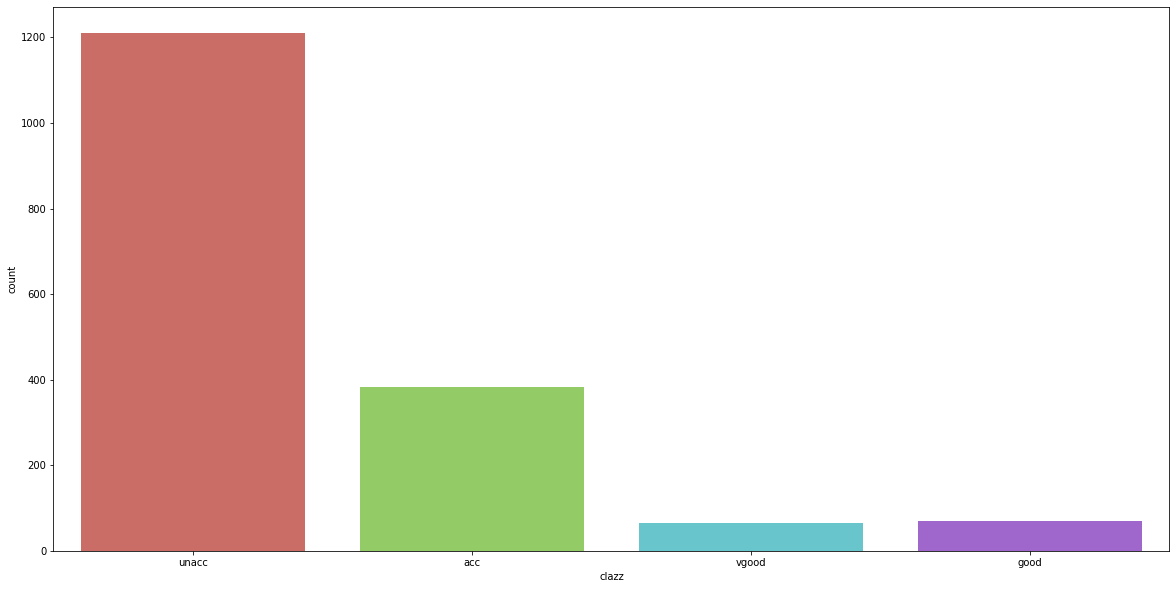

In [ ]:
plt.figure(figsize=(20, 10))
sb.countplot(x=dataset['clazz'], data=dataset, palette='hls');
plt.show()

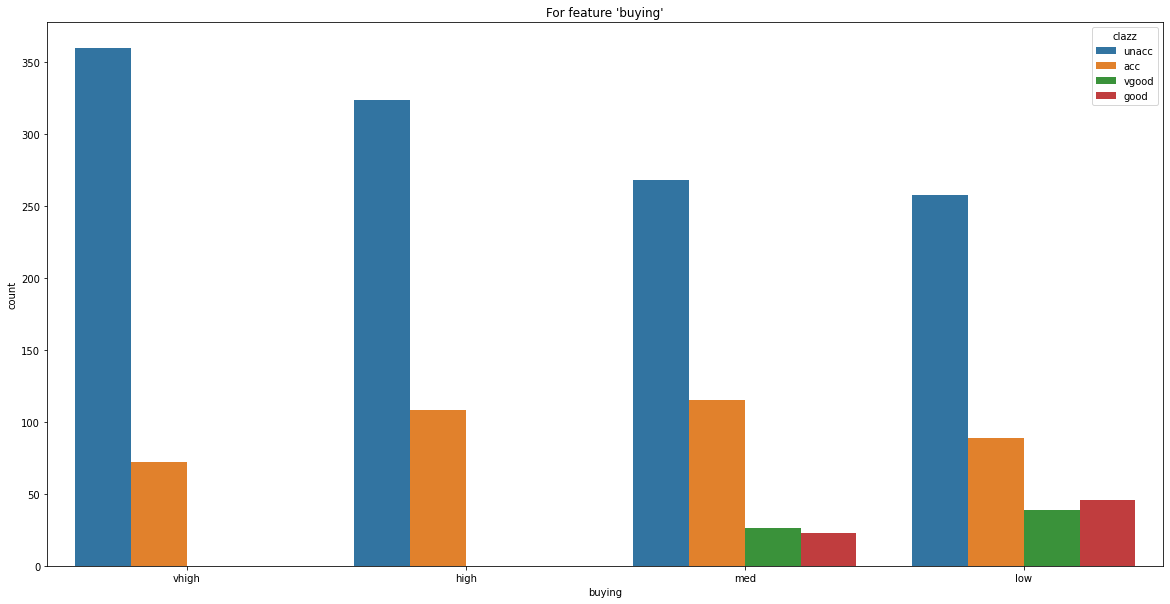

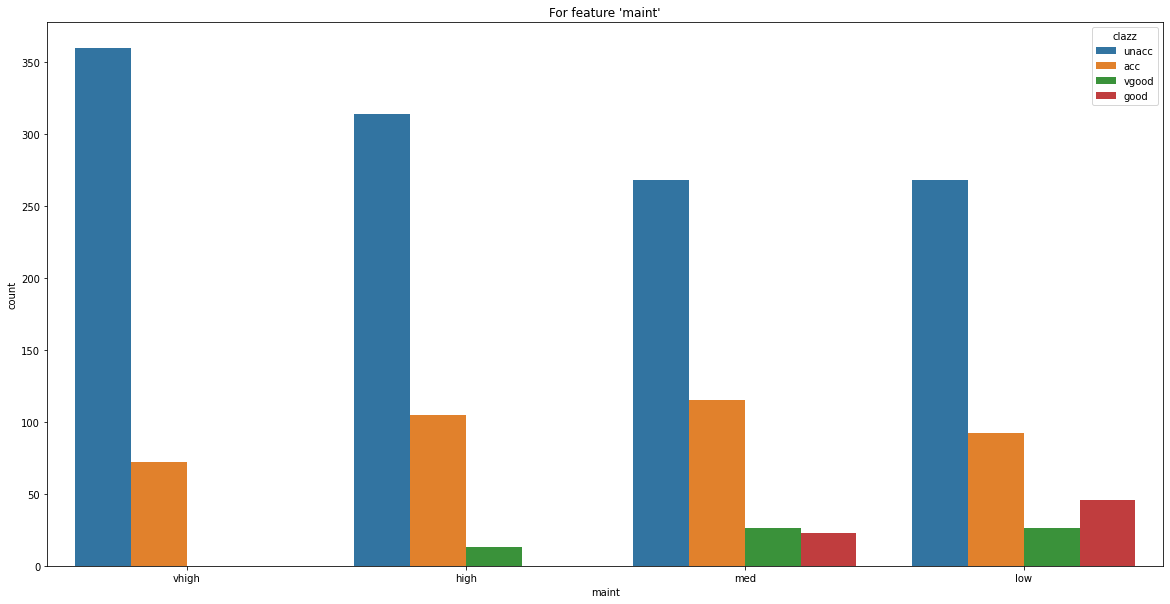

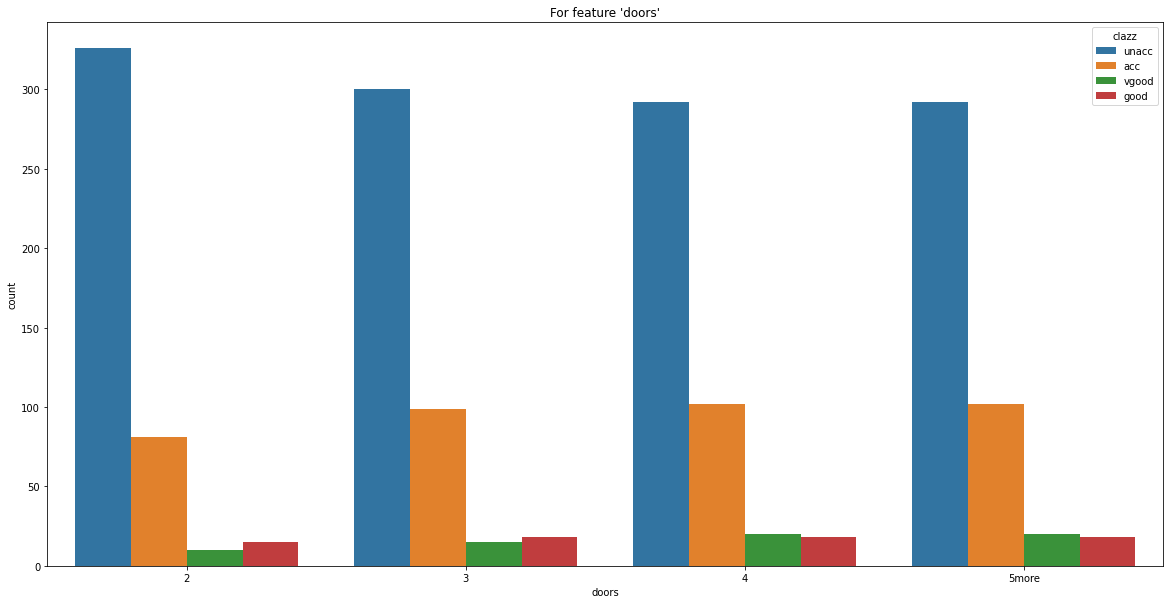

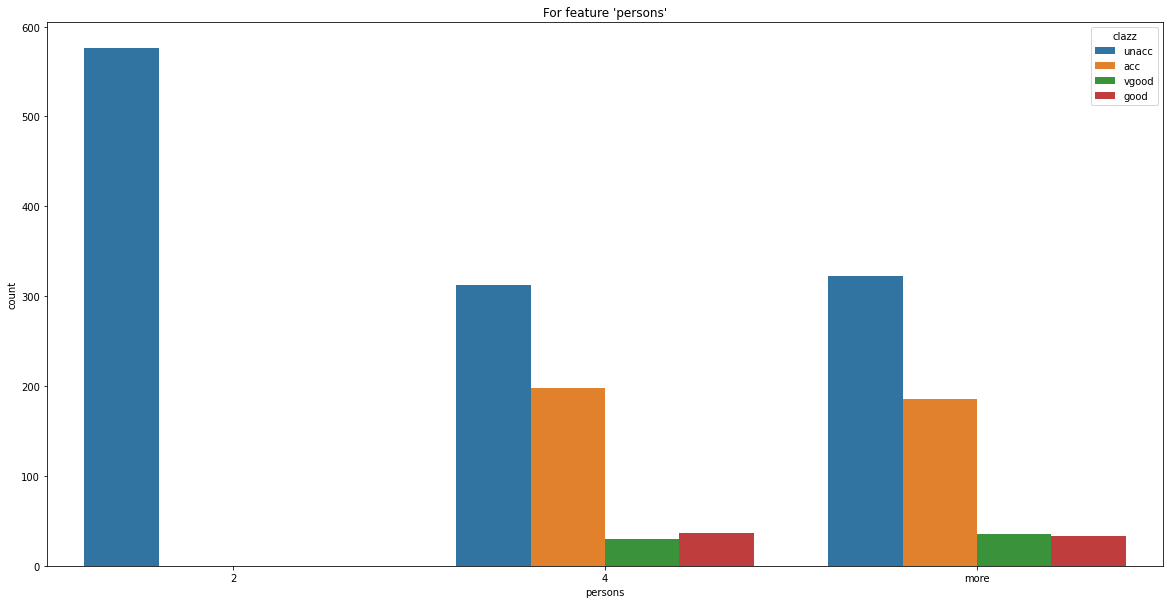

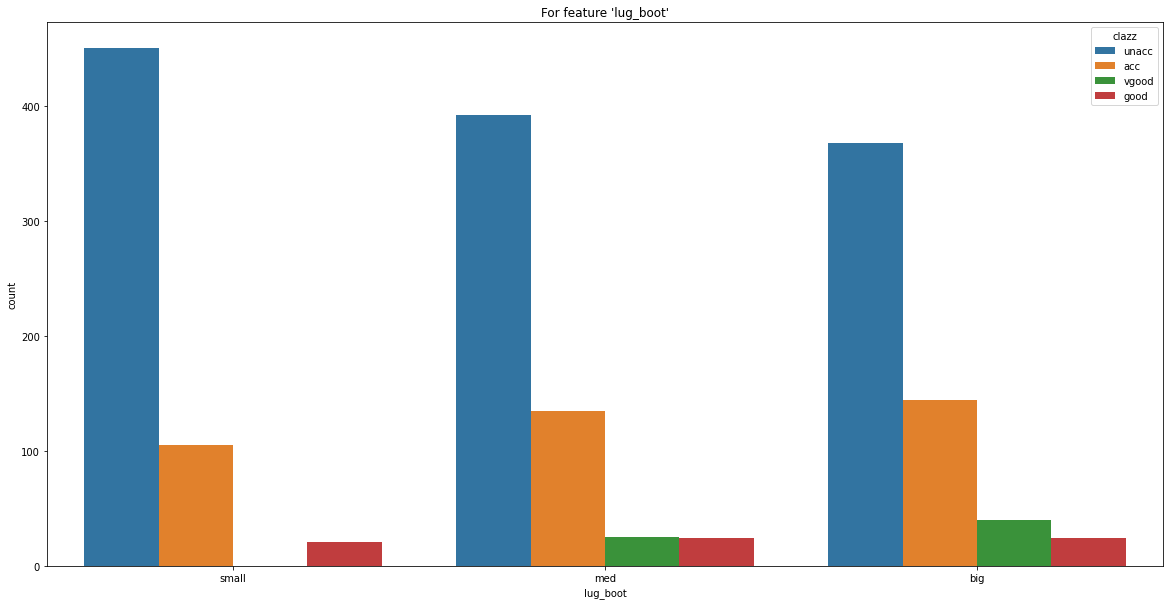

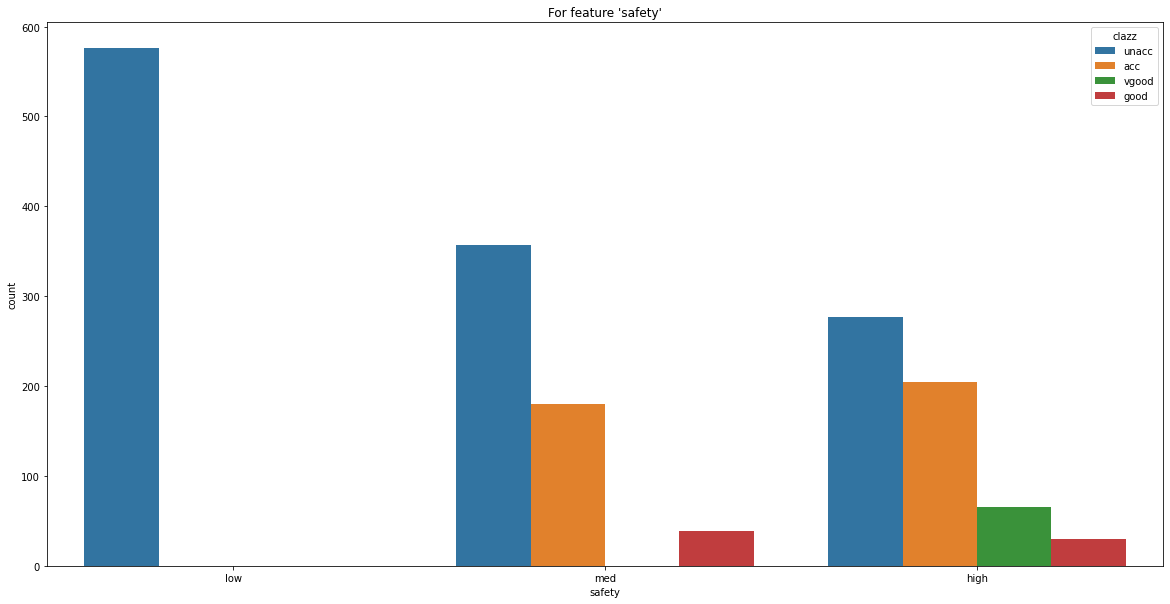

In [ ]:
for i in dataset.columns[:-1]:
    plt.figure(figsize=(20, 10))
    plt.title("For feature '%s'"%i)
    sb.countplot(dataset[i], hue=dataset['clazz'])

In [ ]:
dataset_corr = pd.DataFrame(columns=dataset.columns)
for i in dataset.columns:   
  dataset_corr[i] = pd.Categorical(dataset[i])
  dataset_corr[i] = dataset_corr[i].cat.codes
dataset_corr

,buying,maint,doors,persons,lug_boot,safety,clazz
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [ ]:
dataset_corr.describe()

,buying,maint,doors,persons,lug_boot,safety,clazz
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


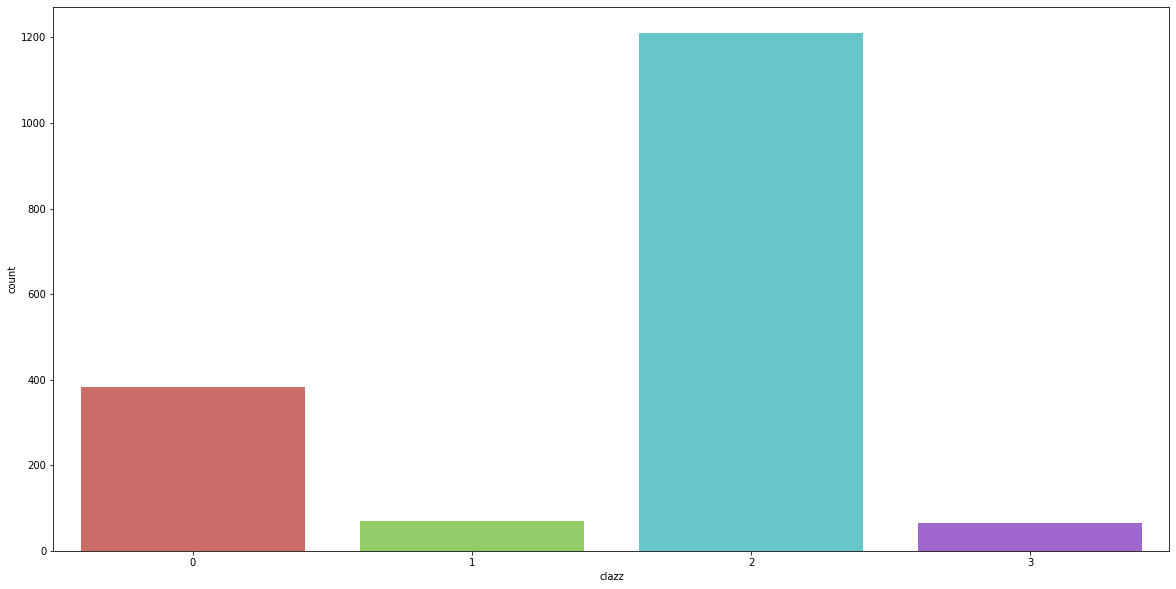

In [ ]:
plt.figure(figsize=(20, 10))
sb.countplot(x=dataset_corr['clazz'], data=dataset_corr, palette='hls');
plt.show()

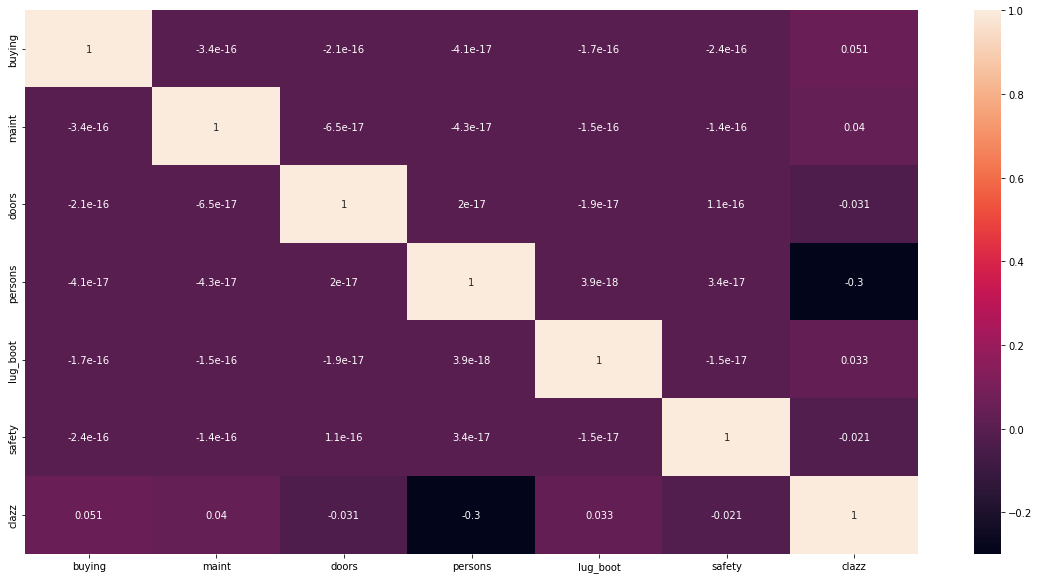

In [ ]:
fig=plt.figure(figsize=(20,10))
sb.heatmap(dataset_corr.corr(), annot=True);

In [ ]:
test_indis = 2
test_dataset = dataset_corr[dataset_corr.index % test_indis == 0]
train_dataset = dataset_corr[dataset_corr.index % test_indis != 0]
print("Total count of sample space of train dataset: ", len(train_dataset))
print("Total count of sample space of test dataset: ", len(test_dataset))

Total count of sample space of train dataset:  864
Total count of sample space of test dataset:  864


In [ ]:
train_dataset

,buying,maint,doors,persons,lug_boot,safety,clazz
1,3,3,0,0,2,2,2
3,3,3,0,0,1,1,2
5,3,3,0,0,1,0,2
7,3,3,0,0,0,2,2
9,3,3,0,1,2,1,2
...,...,...,...,...,...,...,...
1719,1,1,3,2,2,1,2
1721,1,1,3,2,2,0,1
1723,1,1,3,2,1,2,1
1725,1,1,3,2,0,1,2


In [ ]:
test_dataset

,buying,maint,doors,persons,lug_boot,safety,clazz
0,3,3,0,0,2,1,2
2,3,3,0,0,2,0,2
4,3,3,0,0,1,2,2
6,3,3,0,0,0,1,2
8,3,3,0,0,0,0,2
...,...,...,...,...,...,...,...
1718,1,1,3,1,0,0,3
1720,1,1,3,2,2,2,0
1722,1,1,3,2,1,1,2
1724,1,1,3,2,1,0,3


In [ ]:
clf = CategoricalNB()

In [ ]:
clf.fit(train_dataset[train_dataset.columns[0:6]], train_dataset[train_dataset.columns[6]])

CategoricalNB()

In [ ]:
clf.score(test_dataset[test_dataset.columns[0:6]], test_dataset[test_dataset.columns[6]], sample_weight=None)

0.8645833333333334

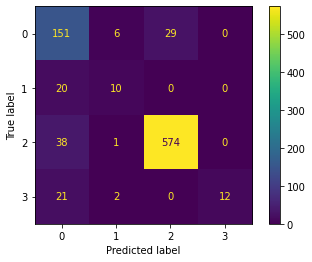

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(test_dataset[test_dataset.columns[6]], clf.predict(test_dataset[test_dataset.columns[0:6]]))).plot();

In [ ]:
print(classification_report(test_dataset[test_dataset.columns[6]], clf.predict(test_dataset[test_dataset.columns[0:6]]), target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       186
           1       0.53      0.33      0.41        30
           2       0.95      0.94      0.94       613
           3       1.00      0.34      0.51        35

    accuracy                           0.86       864
   macro avg       0.78      0.61      0.65       864
weighted avg       0.88      0.86      0.86       864



In [ ]:
def create_prob_dictionay(x, y):
    features = list(x.columns)
    instance, n_features = x.shape
    likelihood = {}
    prior = {}
    evidence = {}
    for f in features:
        likelihood[f] = {}
        evidence[f] = {}
        for v in np.unique(x[f]):     
            evidence[f].update({v:0}) 
            for i in np.unique(y):
                likelihood[f].update({str(v) + '_' + i:0})
                prior.update({i: 0})
    return likelihood, prior, evidence

In [ ]:
likelihood, prior, evidence = create_prob_dictionay(dataset[dataset.columns[0:6]], dataset[dataset.columns[6]])

In [ ]:
def prior_probability(y, p_class):
    size = y.shape[0]
    for i in np.unique(y):
        i_count = sum(y == i)
        p_class[i] = i_count / size 
    return p_class

In [ ]:
prior_probability(dataset[dataset.columns[6]], prior)

{'acc': 0.2222222222222222,
 'good': 0.03993055555555555,
 'unacc': 0.7002314814814815,
 'vgood': 0.03761574074074074}

This is the prior probability for all four categories of the target variable based on the original dataset. It shows how unbalanced the data is and how much likelihood each of these categories has to occur when the car's evaluation is done.

In [ ]:
def likelihood_probability(x, y, lhood):
    features = list(x.columns)
    size = x.shape[0]
    for f in features:
        for i in np.unique(y):
            i_count = sum(y == i)
            flikehood = x[f][y[y == i].index.values.tolist()].value_counts().to_dict()
            for k, l in flikehood.items():
                lhood[f][k + '_' + i] = l / i_count  
    return lhood

In [ ]:
likelihood_probability(dataset[dataset.columns[0:6]], dataset[dataset.columns[6]], likelihood)

{'buying': {'high_acc': 0.28125,
  'high_good': 0,
  'high_unacc': 0.26776859504132233,
  'high_vgood': 0,
  'low_acc': 0.23177083333333334,
  'low_good': 0.6666666666666666,
  'low_unacc': 0.21322314049586777,
  'low_vgood': 0.6,
  'med_acc': 0.2994791666666667,
  'med_good': 0.3333333333333333,
  'med_unacc': 0.22148760330578512,
  'med_vgood': 0.4,
  'vhigh_acc': 0.1875,
  'vhigh_good': 0,
  'vhigh_unacc': 0.2975206611570248,
  'vhigh_vgood': 0},
 'maint': {'high_acc': 0.2734375,
  'high_good': 0,
  'high_unacc': 0.25950413223140495,
  'high_vgood': 0.2,
  'low_acc': 0.23958333333333334,
  'low_good': 0.6666666666666666,
  'low_unacc': 0.22148760330578512,
  'low_vgood': 0.4,
  'med_acc': 0.2994791666666667,
  'med_good': 0.3333333333333333,
  'med_unacc': 0.22148760330578512,
  'med_vgood': 0.4,
  'vhigh_acc': 0.1875,
  'vhigh_good': 0,
  'vhigh_unacc': 0.2975206611570248,
  'vhigh_vgood': 0},
 'doors': {'2_acc': 0.2109375,
  '2_good': 0.21739130434782608,
  '2_unacc': 0.2694214876

This is the likelihood probability for each input variable along with their sub-categories concerning the target variable categories. It describes the likelihood for a combination of the feature variable category and target variable category to occur together when evaluating a car. These values give us the probability of the category of a given feature when we know the evaluation of the car.

In [ ]:
def evidence_probability(x, evid):
    features = list(x.columns)
    size = x.shape[0]
    for f in features:
        fval = x[f].value_counts().to_dict()
        for i, j in fval.items():
            evid[f][i] = j / size
    return evid

In [ ]:
evidence_probability(dataset[dataset.columns[0:6]], evidence)

{'buying': {'high': 0.25, 'low': 0.25, 'med': 0.25, 'vhigh': 0.25},
 'maint': {'high': 0.25, 'low': 0.25, 'med': 0.25, 'vhigh': 0.25},
 'doors': {'2': 0.25, '3': 0.25, '4': 0.25, '5more': 0.25},
 'persons': {'2': 0.3333333333333333,
  '4': 0.3333333333333333,
  'more': 0.3333333333333333},
 'lug_boot': {'big': 0.3333333333333333,
  'med': 0.3333333333333333,
  'small': 0.3333333333333333},
 'safety': {'high': 0.3333333333333333,
  'low': 0.3333333333333333,
  'med': 0.3333333333333333}}

These are evidence probability values for each of the input variables. including their sub-categories.

In [ ]:
test_dataset['y_pred'] = clf.predict(test_dataset[test_dataset.columns[0:6]])
test_dataset

,buying,maint,doors,persons,lug_boot,safety,clazz,y_pred
0,3,3,0,0,2,1,2,2
2,3,3,0,0,2,0,2,2
4,3,3,0,0,1,2,2,2
6,3,3,0,0,0,1,2,2
8,3,3,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...
1718,1,1,3,1,0,0,3,3
1720,1,1,3,2,2,2,0,1
1722,1,1,3,2,1,1,2,2
1724,1,1,3,2,1,0,3,1


In the following code cells, there are instances of the wrong classification of class for each of the categories in the target variables. These misclassifications occur due to the assumption of conditional independence between every pair of features given the value of the class variable. Sometimes, one feature can over-power other features in the process of decision-making, while in some cases some features combined can over-power a major feature. Training with a larger dataset ensures better model generalization.

In [ ]:
for i in test_dataset.index:
  if test_dataset['clazz'][i] == 0 and test_dataset['clazz'][i] != test_dataset['y_pred'][i]:
      print(test_dataset.loc[[i]])
      break;

     buying  maint  doors  persons  lug_boot  safety  clazz  y_pred
232       3      2      0        1         0       2      0       2


Here, the class is misclassified as 2 (unacc) instead of 0 (acc).

In [ ]:
for i in test_dataset.index:
  if test_dataset['clazz'][i] == 1 and test_dataset['clazz'][i] != test_dataset['y_pred'][i]:
      print(test_dataset.loc[[i]])
      break;

      buying  maint  doors  persons  lug_boot  safety  clazz  y_pred
1202       2      1      0        1         1       0      1       0


Here, the class is misclassified as 0 (acc) instead of 1 (good).

In [ ]:
for i in test_dataset.index:
  if test_dataset['clazz'][i] == 2 and test_dataset['clazz'][i] != test_dataset['y_pred'][i]:
      print(test_dataset.loc[[i]])
      break;

     buying  maint  doors  persons  lug_boot  safety  clazz  y_pred
122       3      0      0        1         1       0      2       0


Here, the class is misclassified as 0 (acc) instead of 2 (unacc).

In [ ]:
for i in test_dataset.index:
  if test_dataset['clazz'][i] == 3 and test_dataset['clazz'][i] != test_dataset['y_pred'][i]:
      print(test_dataset.loc[[i]])
      break;

      buying  maint  doors  persons  lug_boot  safety  clazz  y_pred
1106       2      2      0        2         0       0      3       0


Here, the class is misclassified as 0 (acc) instead of 3 (vgood).